In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, classification_report, mean_absolute_error, mean_squared_error, confusion_matrix

from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.svm import SVC, SVR


In [ ]:
df = pd.read_csv("new_processed_h1b_data.csv")

In [ ]:
df.head()

,CASE_STATUS,WAGE_RATE_OF_PAY_FROM,WAGE_RATE_OF_PAY_TO,PREVAILING_WAGE,RECEIVED_DATE,DECISION_DATE,JOB_TITLE,EMPLOYER_NAME,EMPLOYER_STATE,WORKSITE_CITY,WORKSITE_STATE,SOC_CODE,SOC_TITLE,TOTAL_WORKER_POSITIONS,FULL_TIME_POSITION,H_1B_DEPENDENT,WILLFUL_VIOLATOR,NAICS_CODE,PROCESSING_TIME
0,Certified,38.57,38.57,39.0,2019-09-25,2019-10-01,BI DEVELOPER II,DENKEN SOLUTIONS INC.,CA,BRENTWOOD,TN,15-1132,"SOFTWARE DEVELOPERS, APPLICATIONS",1,Y,Yes,No,541512,6
1,Certified,57.69,57.69,53.0,2019-09-25,2019-10-01,"SOFTWARE DEVELOPER, APPLICATIONS","SYSTEMS TECHNOLOGY GROUP, INC.",MI,Taylor,MI,15-1132,"SOFTWARE DEVELOPERS, APPLICATIONS",1,Y,Yes,No,541511,6
2,Certified,73000.00,73000.00,72280.0,2019-09-25,2019-10-01,OPERATION RESEARCH ANALYSTS,"BIZINTEX, INC.",GA,San Jose,CA,15-2031,OPERATIONS RESEARCH ANALYSTS,1,Y,Yes,No,541511,6
3,Certified,84000.00,84000.00,73091.0,2019-09-25,2019-10-01,SOFTWARE DEVELOPER,"NEMO IT SOLUTIONS, INC",TX,JACKSONVILLE,FL,15-1132,"SOFTWARE DEVELOPERS, APPLICATIONS",1,Y,Yes,No,541511,6
4,Certified,76000.00,76000.00,75546.0,2019-09-25,2019-10-01,POWER BI ADMINISTRATOR,TECH MATRIX INC,NJ,The Woodlands,TX,15-1199,"COMPUTER OCCUPATIONS, ALL OTHER",1,Y,Yes,No,541511,6


In [ ]:
df.isnull().sum()

CASE_STATUS                 0
WAGE_RATE_OF_PAY_FROM       0
WAGE_RATE_OF_PAY_TO         0
PREVAILING_WAGE           503
RECEIVED_DATE               0
DECISION_DATE               0
JOB_TITLE                   0
EMPLOYER_NAME               0
EMPLOYER_STATE              0
WORKSITE_CITY               0
WORKSITE_STATE              0
SOC_CODE                    0
SOC_TITLE                   0
TOTAL_WORKER_POSITIONS      0
FULL_TIME_POSITION          0
H_1B_DEPENDENT              0
WILLFUL_VIOLATOR            0
NAICS_CODE                  0
PROCESSING_TIME             0
dtype: int64

In [ ]:
df['PREVAILING_WAGE'] = df['PREVAILING_WAGE'].fillna(df['PREVAILING_WAGE'].median())

In [ ]:
features = ['WAGE_RATE_OF_PAY_FROM', 'PREVAILING_WAGE', 'EMPLOYER_STATE',
                   'WORKSITE_STATE', 'SOC_CODE', 'TOTAL_WORKER_POSITIONS',
                   'FULL_TIME_POSITION', 'H_1B_DEPENDENT', 'WILLFUL_VIOLATOR', 'NAICS_CODE']
target = "CASE_STATUS"

In [ ]:
df2 = df[features + [target]] #create new table conaining features and target column

In [ ]:
df2["FULL_TIME_POSITION"] = df2["FULL_TIME_POSITION"].map({"Y": 1, "N": 0}) #convert Y as 1 and N as 0

C:\Users\Abhay\AppData\Local\Temp\ipykernel_20108\2132874866.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2["FULL_TIME_POSITION"] = df2["FULL_TIME_POSITION"].map({"Y": 1, "N": 0})


In [ ]:
df2.head()

,WAGE_RATE_OF_PAY_FROM,PREVAILING_WAGE,EMPLOYER_STATE,WORKSITE_STATE,SOC_CODE,TOTAL_WORKER_POSITIONS,FULL_TIME_POSITION,H_1B_DEPENDENT,WILLFUL_VIOLATOR,NAICS_CODE,CASE_STATUS
0,38.57,39.0,CA,TN,15-1132,1,1,Yes,No,541512,Certified
1,57.69,53.0,MI,MI,15-1132,1,1,Yes,No,541511,Certified
2,73000.00,72280.0,GA,CA,15-2031,1,1,Yes,No,541511,Certified
3,84000.00,73091.0,TX,FL,15-1132,1,1,Yes,No,541511,Certified
4,76000.00,75546.0,NJ,TX,15-1199,1,1,Yes,No,541511,Certified


In [ ]:
# Encode categorical features
label_encoders = {}
for col in ["SOC_CODE"]:

    le = LabelEncoder()
    df2[col] = le.fit_transform(df2[col])
    label_encoders[col] = le


C:\Users\Abhay\AppData\Local\Temp\ipykernel_20108\418606352.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2[col] = le.fit_transform(df2[col])


In [ ]:
from sklearn.preprocessing import LabelEncoder

# Define categorical columns
categorical_cols = ['EMPLOYER_STATE', 'WORKSITE_STATE', 'H_1B_DEPENDENT', 'WILLFUL_VIOLATOR']

# Apply Label Encoding
for col in categorical_cols:
    le = LabelEncoder()
    df2[col] = le.fit_transform(df2[col].astype(str).fillna("Unknown"))  # Convert to string and handle NaN

C:\Users\Abhay\AppData\Local\Temp\ipykernel_20108\2120630747.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2[col] = le.fit_transform(df2[col].astype(str).fillna("Unknown"))  # Convert to string and handle NaN
C:\Users\Abhay\AppData\Local\Temp\ipykernel_20108\2120630747.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2[col] = le.fit_transform(df2[col].astype(str).fillna("Unknown"))  # Convert to string and handle NaN
C:\Users\Abhay\AppData\Local\Temp\ipykernel_20108\2120630747.py:9: SettingWith

In [ ]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df2["CASE_STATUS_ENCODED"] = label_encoder.fit_transform(df2["CASE_STATUS"])


C:\Users\Abhay\AppData\Local\Temp\ipykernel_20108\3085763028.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2["CASE_STATUS_ENCODED"] = label_encoder.fit_transform(df2["CASE_STATUS"])


In [ ]:
# Handle missing values
df2.dropna(inplace=True)


C:\Users\Abhay\AppData\Local\Temp\ipykernel_20108\214172900.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.dropna(inplace=True)


## 1️⃣ Predicting Visa Approval Status (Classification)
- **Objective**: Predict whether an H-1B application will be Certified / Denied based on employer details, job title, salary, etc.


In [ ]:
# Split dataset
X = df2.drop(columns=["CASE_STATUS_ENCODED", "CASE_STATUS"])
y = df2["CASE_STATUS_ENCODED"]
y = LabelEncoder().fit_transform(y)  # Encode CASE_STATUS


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


### 1] Random Forest

In [ ]:
# Initialize and train Random Forest model
rf_clf = RandomForestClassifier(n_estimators=10, random_state=42)
rf_clf.fit(X_train, y_train)


RandomForestClassifier(n_estimators=10, random_state=42)

In [ ]:
print(df2.dtypes)


WAGE_RATE_OF_PAY_FROM     float64
PREVAILING_WAGE           float64
EMPLOYER_STATE              int32
WORKSITE_STATE              int32
SOC_CODE                    int32
TOTAL_WORKER_POSITIONS      int64
FULL_TIME_POSITION          int64
H_1B_DEPENDENT              int32
WILLFUL_VIOLATOR            int32
NAICS_CODE                  int64
CASE_STATUS                object
CASE_STATUS_ENCODED         int32
dtype: object


In [ ]:
# Evaluate model
print("Training Accuracy:", rf_clf.score(X_train, y_train))
print("Testing Accuracy:", rf_clf.score(X_test, y_test))

Training Accuracy: 0.947932235036165
Testing Accuracy: 0.9089215589710209


## 2️⃣ Salary Prediction for H-1B Employees (Regression)
- **Objective**: Predict the salary offered for an H-1B application.

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [ ]:
# Train Regression Model
reg_model = LinearRegression()
reg_model.fit(X_train, y_train)

LinearRegression()

In [ ]:
# Predictions
y_pred = reg_model.predict(X_test)

In [ ]:
# Evaluate model
print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))


MAE: 0.21828263423526556
MSE: 0.2223450277843781
R² Score: 0.006354033557398275


## 3️⃣ Forecasting Visa Application Trends (Time Series)
- **Objective**: Forecast the number of H-1B applications in the future.

In [ ]:
import statsmodels.api as sm

In [ ]:
df2.head()

,WAGE_RATE_OF_PAY_FROM,PREVAILING_WAGE,EMPLOYER_STATE,WORKSITE_STATE,SOC_CODE,TOTAL_WORKER_POSITIONS,FULL_TIME_POSITION,H_1B_DEPENDENT,WILLFUL_VIOLATOR,NAICS_CODE,CASE_STATUS,CASE_STATUS_ENCODED
0,38.57,39.0,4,45,221,1,1,1,0,541512,Certified,0
1,57.69,53.0,24,23,221,1,1,1,0,541511,Certified,0
2,73000.00,72280.0,11,4,320,1,1,1,0,541511,Certified,0
3,84000.00,73091.0,47,9,221,1,1,1,0,541511,Certified,0
4,76000.00,75546.0,34,46,240,1,1,1,0,541511,Certified,0


#### Step 1: Convert Dates & Aggregate Data
- Use ```YEAR_MONTH``` column as the time index and aggregate the count of H-1B applications.

In [ ]:
# Convert decision date and received date to datetime
df["DECISION_DATE"] = pd.to_datetime(df["DECISION_DATE"])
df["RECEIVED_DATE"] = pd.to_datetime(df["RECEIVED_DATE"])

In [ ]:
df["YEAR_MONTH"] = df["DECISION_DATE"].dt.to_period("M")


In [ ]:
df["YEAR_MONTH"] = df["YEAR_MONTH"].dt.to_timestamp()


In [ ]:
# Aggregate application counts per month
time_series_data = df.groupby("YEAR_MONTH").size()

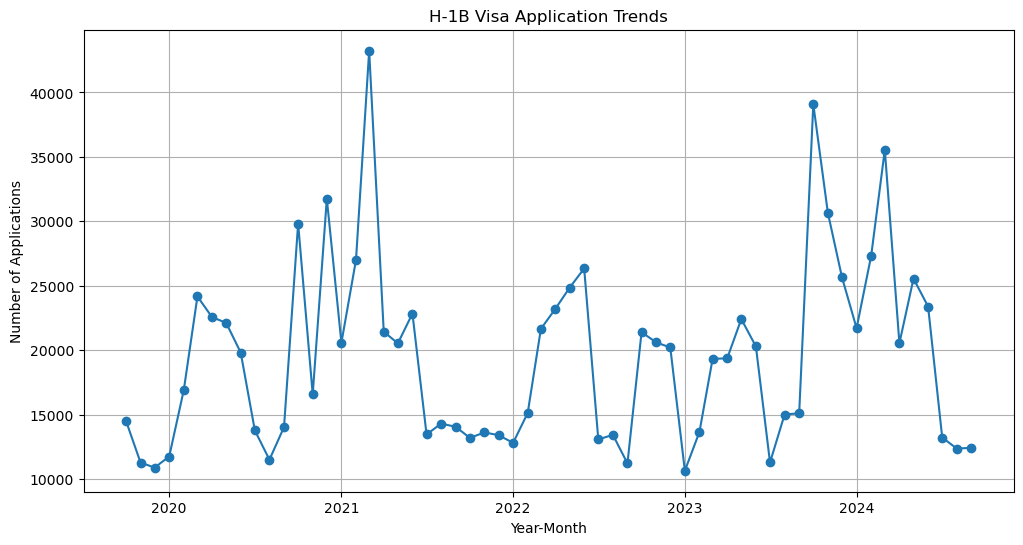

In [ ]:
# Plot trend
plt.figure(figsize=(12, 6))
plt.plot(time_series_data, marker="o", linestyle="-")
plt.xlabel("Year-Month")
plt.ylabel("Number of Applications")
plt.title("H-1B Visa Application Trends")
plt.grid(True)
plt.show()

#### Step 2: Seasonal Decomposition
- Analyze seasonality, trend, and residuals using ```statsmodels```.

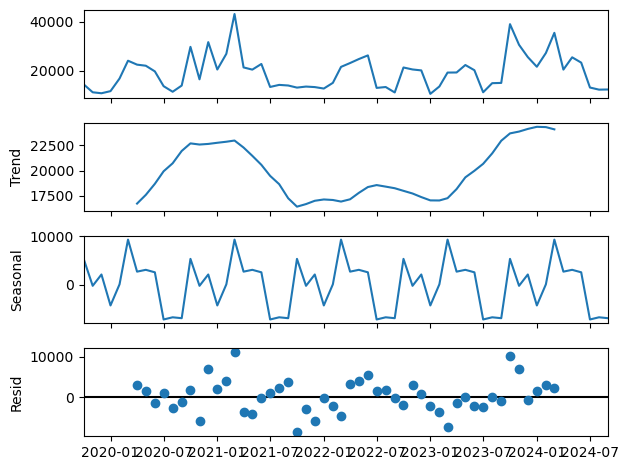

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Decompose Time Series
decomposed = seasonal_decompose(time_series_data, model='additive', period=12)

# Plot decomposition
decomposed.plot()
plt.show()


#### Step 3: Forecast Future Trends (ARIMA)
- Use ARIMA to forecast future H-1B applications.

C:\Users\Abhay\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Abhay\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Abhay\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Abhay\AppData\Local\Temp\ipykernel_20108\1183446466.py:13: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  plt.plot(pd.date_range(start=time_series_data.index[-1], periods=12, freq='M'), forecast, linestyle="dashed", color="red", label="Forecast")


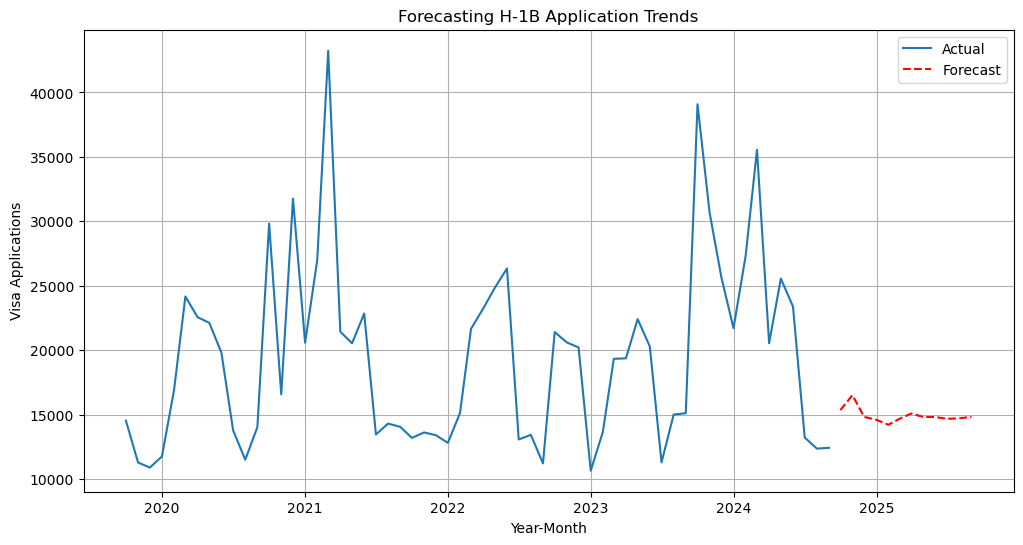

In [ ]:
import statsmodels.api as sm

# Fit ARIMA Model
arm_model = sm.tsa.ARIMA(time_series_data, order=(5,1,0))  # (p,d,q)
arm_model_fit = arm_model.fit()

# Forecast next 12 months
forecast = arm_model_fit.forecast(steps=12)

# Plot
plt.figure(figsize=(12, 6))
plt.plot(time_series_data, label="Actual")
plt.plot(pd.date_range(start=time_series_data.index[-1], periods=12, freq='M'), forecast, linestyle="dashed", color="red", label="Forecast")
plt.xlabel("Year-Month")
plt.ylabel("Visa Applications")
plt.title("Forecasting H-1B Application Trends")
plt.legend()
plt.grid(True)
plt.show()


#### Step 4: Forecast Processing Time
- To predict processing time trends, aggregate ```PROCESSING_TIME``` by month.

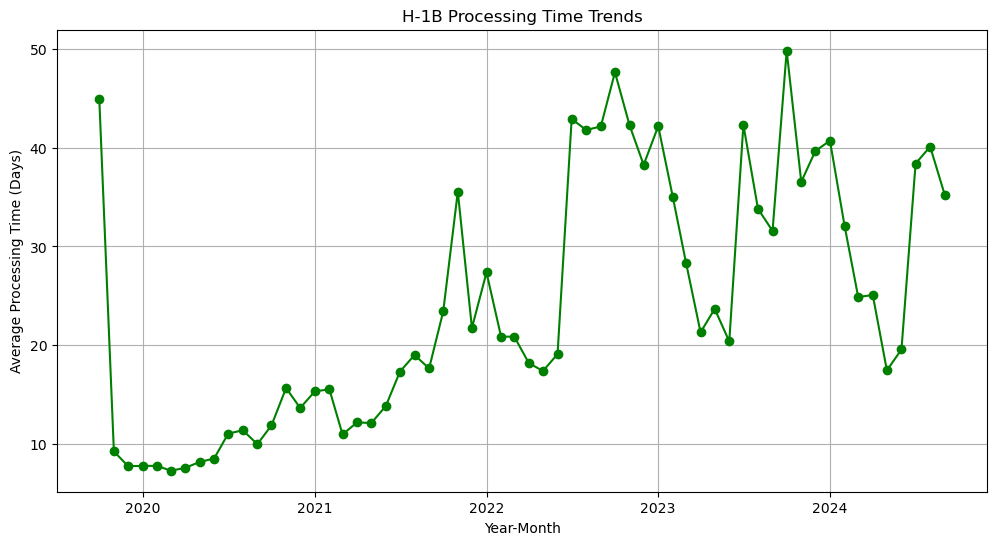

In [ ]:
# Aggregate average processing time per month
processing_time_trend = df.groupby("YEAR_MONTH")["PROCESSING_TIME"].mean()

# Plot trend
plt.figure(figsize=(12, 6))
plt.plot(processing_time_trend, marker="o", linestyle="-", color="green")
plt.xlabel("Year-Month")
plt.ylabel("Average Processing Time (Days)")
plt.title("H-1B Processing Time Trends")
plt.grid(True)
plt.show()


## 4️⃣ Identifying High-Risk Employers (Anomaly Detection)
- **Objective**: Identify employers with unusually high denial rates or wage discrepancies.

In [ ]:
from sklearn.ensemble import IsolationForest


In [ ]:
# Compute employer denial rate
employer_risk = df.groupby("EMPLOYER_NAME")["CASE_STATUS"].apply(lambda x: (x == "DENIED").mean()).reset_index()
employer_risk.columns = ["EMPLOYER_NAME", "DENIAL_RATE"]

In [ ]:
# Anomaly detection
iso_forest = IsolationForest(contamination=0.05, random_state=42)
employer_risk["ANOMALY"] = iso_forest.fit_predict(employer_risk[["DENIAL_RATE"]])


In [ ]:
# Display high-risk employers
high_risk_employers = employer_risk[employer_risk["ANOMALY"] == -1]
print(high_risk_employers.sort_values("DENIAL_RATE", ascending=False).head(10))

Empty DataFrame
Columns: [EMPLOYER_NAME, DENIAL_RATE, ANOMALY]
Index: []


## 5️⃣ Predicting Processing Time for Applications (Regression)
- **Objective**: Predict how long an H-1B application will take for approval.

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor


In [ ]:
# Train Gradient Boosting Model
gb_model = GradientBoostingRegressor(n_estimators=10, random_state=42)
gb_model.fit(X_train, y_train)


GradientBoostingRegressor(n_estimators=10, random_state=42)

In [ ]:
# Predictions
y_pred = gb_model.predict(X_test)

In [ ]:
# Evaluate model
print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))

MAE: 0.21752905168889256
MSE: 0.2212234420738711
R² Score: 0.01136632966480522


In [ ]:
np.unique(df['CASE_STATUS'])

array(['Certified', 'Certified - Withdrawn', 'Denied', 'Withdrawn'],
      dtype=object)

## 6️⃣ Gradient Boosting Classifier

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

gbc = GradientBoostingClassifier(n_estimators=10, random_state=42)
gbc.fit(X_train, y_train)  # Ensure y_train is encoded



GradientBoostingClassifier(n_estimators=10, random_state=42)

In [ ]:
import joblib

In [ ]:
# Example visa status labels
y_train = ["Certified", "Denied", "Certified", "Withdrawn", "Denied"]

# Create and fit LabelEncoder
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)

# Save LabelEncoder as a separate `.pkl` file
joblib.dump(label_encoder, "label_encoder.pkl")
print("LabelEncoder saved successfully!")


LabelEncoder saved successfully!


In [ ]:
import joblib


joblib.dump(rf_clf, "rf_model.pkl")
joblib.dump(reg_model, "regression_model.pkl")
joblib.dump(arm_model_fit, "arm_model.pkl")
joblib.dump(gb_model, "gradient_model.pkl")
joblib.dump(gbc, "gradient_boost_class.pkl")

['gradient_boost_class.pkl']

In [ ]:
rf_model = joblib.load("rf_model.pkl")
linear_rg = joblib.load("regression_model.pkl")
time_model = joblib.load("arm_model.pkl")
gradient_bst = joblib.load("gradient_model.pkl")
gradient_bst_classf = joblib.load("gradient_boost_class.pkl")

In [ ]:
# Define the features required for prediction
feature_columns = ['WAGE_RATE_OF_PAY_FROM', 'PREVAILING_WAGE', 'EMPLOYER_STATE',
                   'WORKSITE_STATE', 'SOC_CODE', 'TOTAL_WORKER_POSITIONS',
                   'FULL_TIME_POSITION', 'H_1B_DEPENDENT', 'WILLFUL_VIOLATOR', 'NAICS_CODE']


In [ ]:
# Function to take user input
def get_user_input():
    print("\nEnter the following details for prediction:\n")

    WAGE_RATE_OF_PAY_FROM = float(input("Enter Wage Rate of Pay (From): "))
    PREVAILING_WAGE = float(input("Enter Prevailing Wage: "))
    EMPLOYER_STATE = int(input("Enter Employer State (e.g., CA, TX, NY): "))
    WORKSITE_STATE = int(input("Enter Worksite State (e.g., CA, TX, NY): "))
    SOC_CODE = input("Enter SOC Code (e.g., 13-2011, 15-1121): ")
    TOTAL_WORKER_POSITIONS = int(input("Enter Total Worker Positions: "))
    FULL_TIME_POSITION = input("Is it a Full-Time Position? (Y/N): ").strip().upper()
    H_1B_DEPENDENT = input("Is Employer H-1B Dependent? (Y/N): ").strip().upper()
    WILLFUL_VIOLATOR = input("Is Employer a Willful Violator? (Y/N): ").strip().upper()
    NAICS_CODE = int(input("Enter NAICS Code: "))

    # Encode categorical values
    FULL_TIME_POSITION = 1 if FULL_TIME_POSITION == "Y" else 0
    H_1B_DEPENDENT = 1 if H_1B_DEPENDENT == "Y" else 0
    WILLFUL_VIOLATOR = 1 if WILLFUL_VIOLATOR == "Y" else 0

    # Create DataFrame for input
    user_data = pd.DataFrame([[WAGE_RATE_OF_PAY_FROM, PREVAILING_WAGE, EMPLOYER_STATE,
                               WORKSITE_STATE, SOC_CODE, TOTAL_WORKER_POSITIONS,
                               FULL_TIME_POSITION, H_1B_DEPENDENT, WILLFUL_VIOLATOR, NAICS_CODE]],
                             columns=feature_columns)

    return user_data


In [ ]:
df2.head()

,WAGE_RATE_OF_PAY_FROM,PREVAILING_WAGE,EMPLOYER_STATE,WORKSITE_STATE,SOC_CODE,TOTAL_WORKER_POSITIONS,FULL_TIME_POSITION,H_1B_DEPENDENT,WILLFUL_VIOLATOR,NAICS_CODE,CASE_STATUS,CASE_STATUS_ENCODED
0,38.57,39.0,4,45,221,1,1,1,0,541512,Certified,0
1,57.69,53.0,24,23,221,1,1,1,0,541511,Certified,0
2,73000.00,72280.0,11,4,320,1,1,1,0,541511,Certified,0
3,84000.00,73091.0,47,9,221,1,1,1,0,541511,Certified,0
4,76000.00,75546.0,34,46,240,1,1,1,0,541511,Certified,0


In [ ]:
df2.loc[np.where(df2['CASE_STATUS_ENCODED'] == 3)]

,WAGE_RATE_OF_PAY_FROM,PREVAILING_WAGE,EMPLOYER_STATE,WORKSITE_STATE,SOC_CODE,TOTAL_WORKER_POSITIONS,FULL_TIME_POSITION,H_1B_DEPENDENT,WILLFUL_VIOLATOR,NAICS_CODE,CASE_STATUS,CASE_STATUS_ENCODED
879,93496.00,93496.0,37,36,811,1,1,0,0,711110,Withdrawn,3
880,32.49,32.0,4,35,221,1,1,1,0,541512,Withdrawn,3
881,35.09,35.0,4,46,240,1,1,1,0,541512,Withdrawn,3
882,37.27,37.0,4,4,221,1,1,1,0,541512,Withdrawn,3
883,38.00,38.0,4,24,221,1,1,1,0,541512,Withdrawn,3
...,...,...,...,...,...,...,...,...,...,...,...,...
1167294,116000.00,114858.0,37,36,288,1,1,0,0,622310,Withdrawn,3
1167395,137786.00,137786.0,37,48,287,1,1,0,0,515120,Withdrawn,3
1167437,102648.00,102648.0,5,33,288,1,1,1,0,541511,Withdrawn,3
1167452,120328.00,120328.0,4,46,288,1,1,0,0,541519,Withdrawn,3


In [ ]:
# Take input and predict
user_input = get_user_input()



Enter the following details for prediction:



Enter Wage Rate of Pay (From):  14523.00
Enter Prevailing Wage:  14523.00
Enter Employer State (e.g., CA, TX, NY):  18
Enter Worksite State (e.g., CA, TX, NY):  17
Enter SOC Code (e.g., 13-2011, 15-1121):  221
Enter Total Worker Positions:  1
Is it a Full-Time Position? (Y/N):  Y
Is Employer H-1B Dependent? (Y/N):  N
Is Employer a Willful Violator? (Y/N):  N
Enter NAICS Code:  622310


Enter the following details for prediction:

Enter Wage Rate of Pay (From):  14523.00
Enter Prevailing Wage:  14523.00
Enter Employer State (e.g., CA, TX, NY):  18
Enter Worksite State (e.g., CA, TX, NY):  17
Enter SOC Code (e.g., 13-2011, 15-1121):  221
Enter Total Worker Positions:  1
Is it a Full-Time Position? (Y/N):  Y
Is Employer H-1B Dependent? (Y/N):  N
Is Employer a Willful Violator? (Y/N):  N
Enter NAICS Code:  622310

In [ ]:
# print(f"\nPredicted Visa Status: {final_prediction1}")
# print(f"\nPredicted Visa Status: {prediction2[0]}")
# print(f"\nPredicted Visa Status: {prediction4[0]}")

In [ ]:
predicted_status = rf_clf.predict(user_input)
final_prediction = label_encoder.inverse_transform(predicted_status)

print(f"Predicted Visa Status: {final_prediction[0]}")


Predicted Visa Status: Certified


In [ ]:
predicted_status = gbc.predict(user_input)
final_prediction = label_encoder.inverse_transform(predicted_status)

print(f"Predicted Visa Status: {final_prediction[0]}")


Predicted Visa Status: Certified


In [ ]:
print(X_train.isnull().sum())  # Check for NaN values
print(X_train.dtypes)  # Check if all columns are numeric


WAGE_RATE_OF_PAY_FROM     0
PREVAILING_WAGE           0
EMPLOYER_STATE            0
WORKSITE_STATE            0
SOC_CODE                  0
TOTAL_WORKER_POSITIONS    0
FULL_TIME_POSITION        0
H_1B_DEPENDENT            0
WILLFUL_VIOLATOR          0
NAICS_CODE                0
dtype: int64
WAGE_RATE_OF_PAY_FROM     float64
PREVAILING_WAGE           float64
EMPLOYER_STATE              int32
WORKSITE_STATE              int32
SOC_CODE                    int32
TOTAL_WORKER_POSITIONS      int64
FULL_TIME_POSITION          int64
H_1B_DEPENDENT              int32
WILLFUL_VIOLATOR            int32
NAICS_CODE                  int64
dtype: object


In [ ]:
print(len(rf_clf.estimators_))  # Should print 100 (for 100 trees)


10


In [ ]:
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import LabelEncoder

# # Encode categorical columns
# categorical_cols = ['EMPLOYER_STATE', 'WORKSITE_STATE', 'H_1B_DEPENDENT', 'WILLFUL_VIOLATOR']
# for col in categorical_cols:
#     le = LabelEncoder()
#     df2[col] = le.fit_transform(df2[col].astype(str).fillna("Unknown"))  # Ensure encoding

# # Define features and target
# X = df2.drop(columns=['CASE_STATUS'])  # Drop target column
# y = df2['CASE_STATUS']

# # Encode target variable if it's categorical
# y = LabelEncoder().fit_transform(y)

# # Train-test split
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Train Random Forest model
# rf_clf = RandomForestClassifier(n_estimators=10, random_state=42)
# rf_clf.fit(X_train, y_train)  # Ensure fitting before using 'estimators_'

# # Verify training
# print(hasattr(rf_clf, "estimators_"))  # Should return True


In [ ]:
import joblib
from sklearn.ensemble import RandomForestClassifier

# Assuming your model is trained
rf_model_navin = RandomForestClassifier(n_estimators=10, random_state=42)
rf_model_navin.fit(X_train, y_train)  # Train the model

# Save the trained model properly
joblib.dump(rf_model_navin, "rf_model.pkl")
print("Model saved successfully!")


In [ ]:
print(f"Expected input shape: {rf_model_navin.n_features_in_}")


In [ ]:
print(X_train.shape)  # Should be (num_samples, num_features)
